In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')
matplotlib.style.use('dark_background')
%matplotlib inline

In [2]:
dataset = load_iris()
X = dataset.data

1. Можно ли отобрать наиболее значимые признаки из имеющихся с помощью PCA? Ответ объясните.

Полагаю, нет. PCA - это фактически способ преобразования системы координат для учета изменений данных. Это не означает, что данные каким-либо образом более важны, чем другие.

2. (*) Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd(). Применить к данным на уроке и сравнить ответы.

In [3]:
U, S, V_T = np.linalg.svd(X)
# D = np.zeros((150, 4), dtype='float32')
D = np.diag(S)[:2, :2]

Z = U[:, :2] @ D @ V_T[:2, :]

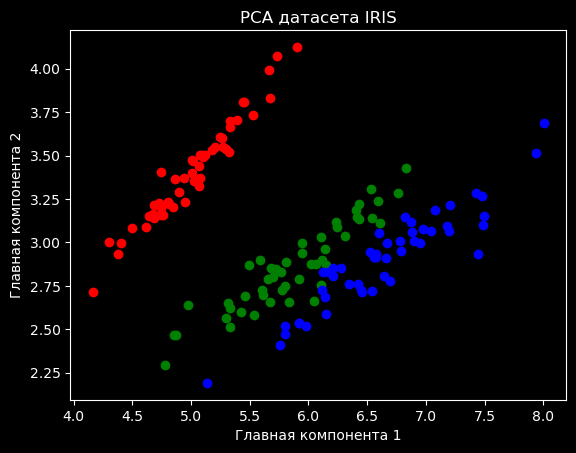

In [4]:
plt.figure()
y = dataset.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y==i, 0], Z[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

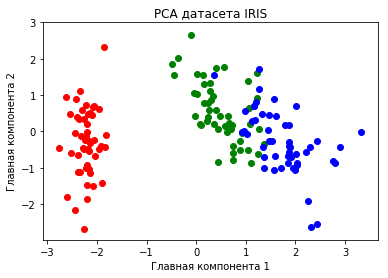

In [ ]:
# с урока

3. (*) Обучить любую модель классификации (из рассмотренных в курсе) на датасете IRIS до применения PCA и после него. Сравнить качество классификации по отложенной выборке.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

X_t_train, X_t_test, y_train, y_test = train_test_split(X_transformed, y, test_size=.25, random_state=42)

In [6]:
# WITH PCA
clr = DecisionTreeClassifier(max_depth=3)
clr.fit(X_t_train, y_train)

y_pred = clr.predict(X_t_test)
accuracy_score(y_test, y_pred)

0.9736842105263158

In [7]:
# WITHOUT PCA
clr = DecisionTreeClassifier(max_depth=3)
clr.fit(X_train, y_train)

y_pred = clr.predict(X_test)
accuracy_score(y_test, y_pred)

1.0